## Задание 1

Будем априорно считать, что выбор осьминога подчиняется бернулевскому распределению с параметром p, где p это вероятность, что он угадает победителя. Тогда количество угаданных побед за 14 попыток это случайная величина с распределением $B(14, p)$.

Так как статистический критерий отображает любую реализацию выборки на гипотезу, нам нужна альтернативная гипотеза $H_{1}$.
- $H_{0}$: $p = 0.5$
- $H_{1}$: $p \neq 0.5$

$H_{1}$ выбираем двустороннюю, так как если $p < 0.5$, то мы переворачиваем метки и все равно получаем победителей.

Возьмем статистику равную $T(X) = \sum^{14}{x_{i}}$, где $x_{i}$ каждый выбор осьминога, 1 $-$ угадал, 0 $-$ не угадал. Распределение статистики $B(14, p)$.

Выберем вероятность, с которой мы готовы допустить ошибку первого рода, $\alpha = 0.05$.

Вычислим $p-value$. При верной нулевой гипотезе нам известно, что распределение статистики $B(14, 0.5)$.

Нарисуем это распределение:

In [84]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
def set_plot_style(title='', xlabel='', ylabel='', is_single=True):
    if is_single:
        plt.figure(figsize=(10, 8))

    sns.set_theme(context='notebook', 
        palette='pastel',
        font='arial',
        font_scale=1.5)

    if is_single:
        plt.grid(True, linestyle='-.')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.minorticks_on()

In [95]:
n = 14
p = 0.5
distr = binom(n, p)
test_T = 12 # сколько он угадал в тесте

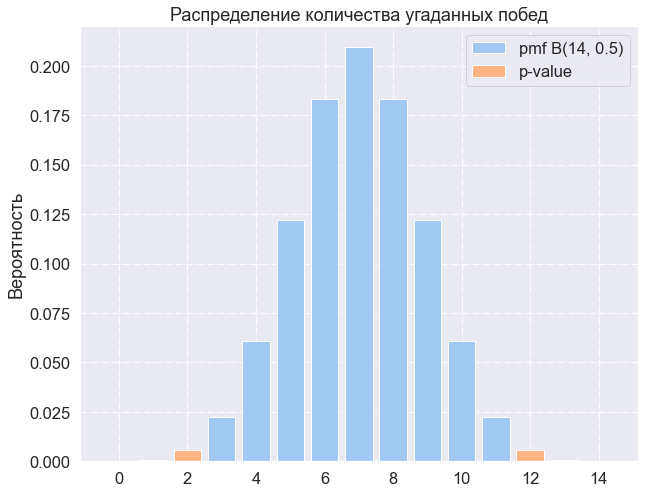

In [100]:
set_plot_style('Распределение количества угаданных побед', '', 'Вероятность')

x = range(0, n + 1)

plt.bar(x, distr.pmf(x), label="pmf B(14, 0.5)")
x = range(test_T, n + 1)
plt.bar(x, distr.pmf(x), label="p-value")
x = range(0, n - test_T + 1)
plt.bar(x, distr.pmf(x), color='C1')


plt.legend()
plt.show()

В этом случае $p$-$value = 2P(\xi \geq m)$, где m значение нашей статистики в тесте, а $\xi$ ~ $B(14, 0.5)$.
В нашем тесте $m = 12$, значит $p$-$value = 2(1 - F(12 - 1))$

In [102]:
p_value = 2 * (1 - distr.cdf(test_T - 1))
p_value

0.012939453125

Сформулируем критерий. Отвергать $H_{0}$ мы будем при $p$-$value < \alpha $, значит значение статистики должно быть больше квантиля $1 - \frac{\alpha}{2}$ либо меньше квантиля $\frac{\alpha}{2}$.


In [103]:
alpha = 0.05
threshold1 = distr.ppf(alpha / 2) - 1
threshold2 = distr.ppf(1 - alpha / 2) + 1
threshold1, threshold2

(2.0, 12.0)

Критерий:
- T(X) $\leq$ 2: $H_{1}$
- $ 2 < T(X) < 14$: $H_{0}$
- T(X) $\geq$ 12: $H_{1}$


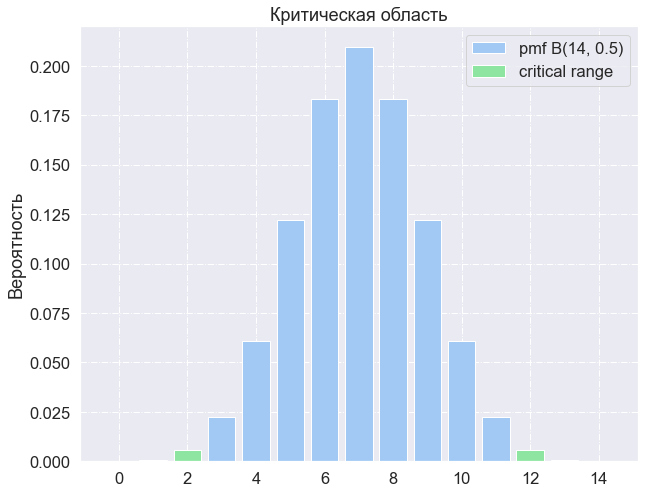

In [106]:
set_plot_style('Критическая область', '', 'Вероятность')
x = range(n + 1)
plt.bar(x, distr.pmf(x), label='pmf B(14, 0.5)')
x = range(int(threshold2), n + 1)
plt.bar(x, distr.pmf(x), color='C2', label='critical range')
x = range(0, int(threshold1) + 1)
plt.bar(x, distr.pmf(x), color='C2')
plt.legend()
plt.show()

Получается при нашем тесте и критерии, мы отвергаем $H_{0}$ и принимаем $H_{1}$.
 
Достингнутный p-value объясняется тем, что даже при маленьком n, тестовое значение статистики достаточно велико.